In [1]:
import carla
import math
import random
import time
import matplotlib.pyplot as plt

In [2]:
#client=carla.Client('localhost',2000)
dt=0.01
world=carla.Client('localhost',2000).get_world()

In [3]:
bp_lib=world.get_blueprint_library()
spawn_points=world.get_map().get_spawn_points()

coords=[]
for i in spawn_points:
    x=i.location.x
    y=i.location.y
    z=i.location.z
    coords.append([x,y,z])

location=carla.Location(x=-64.64484405517578, y=24.471010208129883, z=0.5999999642372131)
rotation=carla.Rotation(pitch=0,yaw=0,roll=0)
transform=carla.Transform(location,rotation)

location2=carla.Location(x=-73, y=24.471010208129883, z=0.5999999642372131)
rotation2=carla.Rotation(pitch=0,yaw=0,roll=0)
transform2=carla.Transform(location2,rotation2)

location3=carla.Location(x=-88, y=24.471010208129883, z=0.5999999642372131)
rotation3=carla.Rotation(pitch=0,yaw=0,roll=0)
transform3=carla.Transform(location3,rotation3)

vehicle_bp1=bp_lib.find('vehicle.lincoln.mkz_2020')
vehicle_bp2=bp_lib.find('vehicle.lincoln.mkz_2020')
vehicle_bp3=bp_lib.find('vehicle.lincoln.mkz_2020')

vehicle=world.try_spawn_actor(vehicle_bp1,transform)
vehicle2=world.try_spawn_actor(vehicle_bp2,transform2)
vehicle3=world.try_spawn_actor(vehicle_bp3,transform3)

spectator=world.get_spectator()
transform1=carla.Transform(vehicle3.get_transform().transform(carla.Location(x=-4,z=2.5)),vehicle3.get_transform().rotation)
spectator.set_transform(transform1)


In [4]:
def saturate(x):
    if x>1:
        return 1
    elif x<-1:
        return -1
    else:
        return x

In [5]:
DY=[]
DY2=[]
DY3=[]

DX=[]
DX2=[]
DX3=[]

Ey=[]
Eyaw=[]

Dyaw_12=[]
Dyaw_23=[]

T=[]

S=[]
S1=[]
S2=[]

Vx1=[]
Vx2=[]
Vx3=[]

Vy1=[]
Vy2=[]
Vy3=[]

Ed_12=[]
Ed_23=[]

In [6]:
#steering control
y_init=vehicle.get_transform().location.y
y_init_2=vehicle2.get_transform().location.y
y_init_3=vehicle3.get_transform().location.y

x_init=vehicle.get_transform().location.x
x_init_2=vehicle2.get_transform().location.x
x_init_3=vehicle3.get_transform().location.x

yaw_init=vehicle.get_transform().rotation.yaw
yaw_init_2=vehicle2.get_transform().rotation.yaw
yaw_init_3=vehicle3.get_transform().rotation.yaw

alpha_12=0
alpha_23=0

lambda_12=0
lambda_23=0

ddef=10
tgap=1

a=0.5
a2=0
a3=0

s=0
s2=0
s3=0

ey=0


#longitudinal control
kp_d=1

#lane change for lead vehicle
kp=1.2
kp2=0.2

#orientation control for followers
kp_o=0.5
kp_y=0.05

vehicle.apply_control(carla.VehicleControl(a,0,0))
vehicle2.apply_control(carla.VehicleControl(a2,0,0))
vehicle3.apply_control(carla.VehicleControl(a3,0,0))
t=time.time()
while (time.time()-t <40):
    
    ts=time.time()-t
    T.append(ts)
    
    x_curr=vehicle.get_transform().location.x
    x_curr_2=vehicle2.get_transform().location.x
    x_curr_3=vehicle3.get_transform().location.x
    
  
    y_curr=vehicle.get_transform().location.y
    y_curr_2=vehicle2.get_transform().location.y
    y_curr_3=vehicle3.get_transform().location.y
    
    yaw_curr=vehicle.get_transform().rotation.yaw
    yaw_curr_2=vehicle2.get_transform().rotation.yaw
    yaw_curr_3=vehicle3.get_transform().rotation.yaw
    
    dy=y_curr-y_init
    dy2=y_curr_2-y_init_2
    dy3=y_curr_3-y_init_3
    
    dx=x_curr-x_init
    dx2=x_curr_2-x_init_2
    dx3=x_curr_3-x_init_3
    

    
    ey=4-dy
    
    
    eyaw=(yaw_curr-yaw_init)*(math.pi/180)
    
    dy_12=y_curr-y_curr_2
    dy_23=y_curr_2-y_curr_3
    
    dx_12=x_curr-x_curr_2
    dx_23=x_curr_2-x_curr_3
    
    alpha_12=math.atan2(dy_12,dx_12)
    alpha_23=math.atan2(dy_23,dx_23)
    
    theta_12=(yaw_curr_2)*(math.pi/180)
    theta_23=(yaw_curr_3)*(math.pi/180)
    
    lambda_12=alpha_12-theta_12
    lambda_23=alpha_23-theta_23
    
    drel_12=math.sqrt(dx_12**2 + dy_12**2)
    drel_23=math.sqrt(dx_23**2 + dy_23**2)
    
    v1x=vehicle.get_velocity().x
    v2x=vehicle2.get_velocity().x
    v3x=vehicle3.get_velocity().x
    
    Vx1.append(v1x)
    Vx2.append(v2x)
    Vx3.append(v3x)
    
    v1y=vehicle.get_velocity().y
    v2y=vehicle2.get_velocity().y
    v3y=vehicle3.get_velocity().y
    
    v1=math.sqrt(v1x**2+v1y**2)
    v2=math.sqrt(v2x**2+v2y**2)
    v3=math.sqrt(v3x**2+v3y**2)
                      
    Vy1.append(v1y)
    Vy2.append(v2y)
    Vy3.append(v3y)
    
    
    
    dsafe_12 = ddef + (tgap*v2*math.cos(lambda_12))
    dsafe_23 = ddef + (tgap*v3*math.cos(lambda_23))
    
    
    
    ed_12=drel_
    
    
   
    
    dyaw_12=(yaw_curr-yaw_curr_2)*(math.pi/180)
    dyaw_23=(yaw_curr_2-yaw_curr_3)*(math.pi/180)
    
    DY.append(dy)
    DY2.append(dy2)
    DY3.append(dy3)
    
    DX.append(dx)
    DX2.append(dx2)
    DX3.append(dx3)
    
    
    Dyaw_12.append(dyaw_12)
    Dyaw_23.append(dyaw_23)
    
    Ed_12.append(ed_12)
    Ed_23.append(ed_23)
    
    Ey.append(ey)
    Eyaw.append(eyaw)
    
    if(time.time()-t >5):
        
        if(dy<=2):
            s=kp2*(ey-2)
            a=0.3
        elif(ey > 0.1 or eyaw>0.05):
            s=-kp*(eyaw)+kp2*(ey)
            a=0.3
        else:
            s=-kp*(eyaw)
            a=0.5
        
    s2=0.4*s+kp_o*(dyaw_12)+kp_y*dy_12
    s3=0.4*s2+kp_o*(dyaw_23)+kp_y*dy_23
        
    a2=saturate(kp_d*ed_12)
    a3=saturate(kp_d*ed_23)



    if (a2>=0):
        a2=a2
        b2=0
    else:
        b2 = abs(a2)
        a2=0

    if (a3>=0):
        a3=a3
        b3=0
    else:
        b3 = abs(a3)
        a3=0

       
            
    vehicle.apply_control(carla.VehicleControl(a,s,0))
    vehicle2.apply_control(carla.VehicleControl(a2,s2,b2))
    vehicle3.apply_control(carla.VehicleControl(a3,s3,b3))
        
    S.append(s)

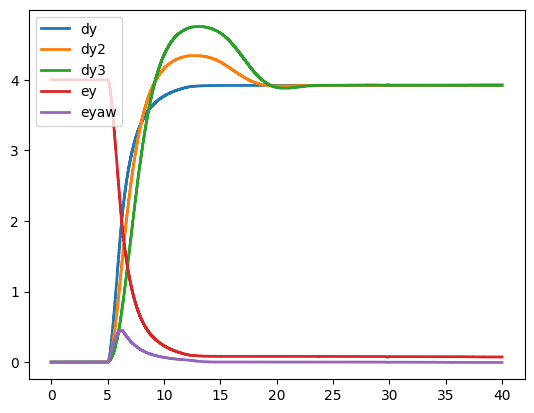

In [7]:
fig, ax = plt.subplots()
ax.plot(T, DY, linewidth=2.0)
ax.plot(T, DY2, linewidth=2.0)
ax.plot(T, DY3, linewidth=2.0)
ax.plot(T, Ey, linewidth=2.0)
ax.plot(T, Eyaw, linewidth=2.0)
#ax.plot(T, S, linewidth=2.0)

plt.legend(["dy","dy2","dy3","ey","eyaw","s"], loc ="upper left")
#plt.legend(["dy","ey","eyaw","s"], loc ="upper left")
plt.show()

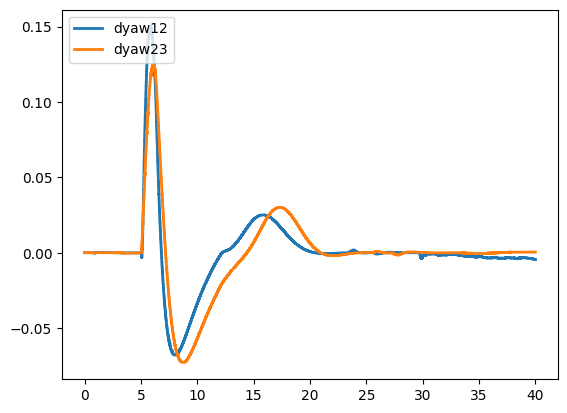

In [8]:
fig, ax = plt.subplots()
ax.plot(T, Dyaw_12, linewidth=2.0)
ax.plot(T, Dyaw_23, linewidth=2.0)


plt.legend(["dyaw12","dyaw23"], loc ="upper left")
plt.show()

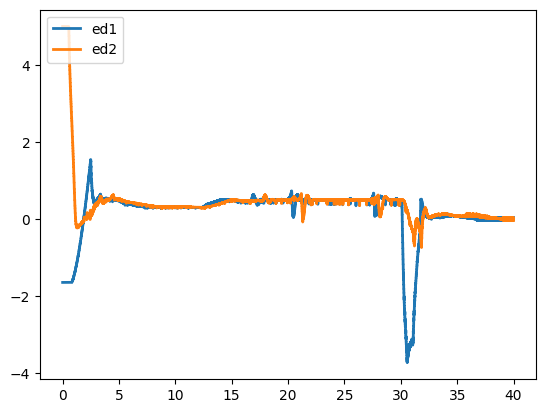

In [9]:
fig, ax = plt.subplots()
ax.plot(T, Ed_12, linewidth=2.0)
ax.plot(T, Ed_23, linewidth=2.0)

plt.legend(["ed1", "ed2"], loc ="upper left")
plt.show()

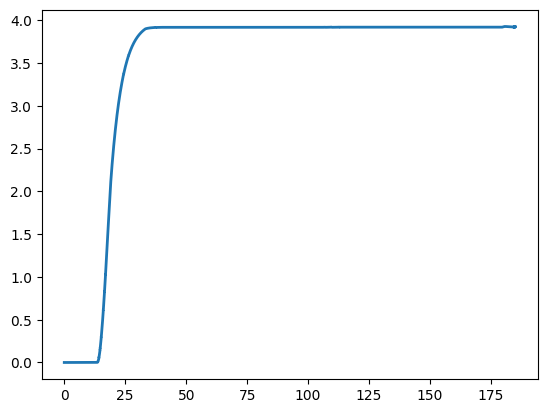

In [10]:
fig, ax = plt.subplots()
ax.plot(DX, DY, linewidth=2.0)
plt.show()

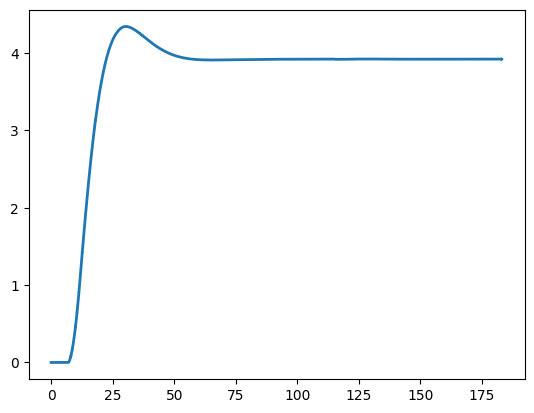

In [11]:
fig, ax = plt.subplots()
ax.plot(DX2, DY2, linewidth=2.0)
plt.show()

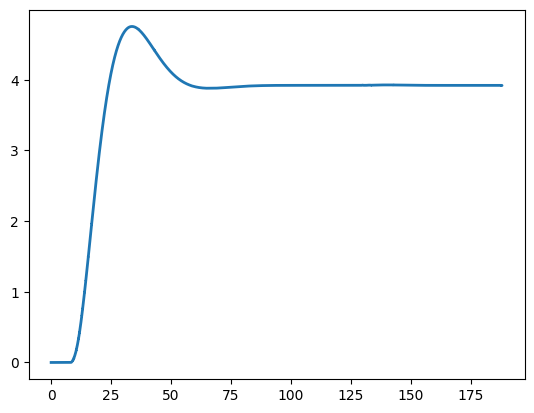

In [12]:
fig, ax = plt.subplots()
ax.plot(DX3, DY3, linewidth=2.0)
plt.show()